# Final Project.
We shall use the capstone guideline for this project:
1. Business Problem.
2. Data Understanding
3. Data Preparation.
4. Modelling
5. Evaluation


# Business Understanding

## 1. Introduction:
This modern age, social media platforms like Twitter act as  major sources for public opinions and feedback. Companies like **Apple**, understanding how customers perceive their products on Twitter is crucial for improving product development, marketing strategies, and customer relationships.

So manually analyzing thousands of tweets to understand sentiment is an insane task so to speak. **Natural Language Processing (NLP)** can automate this process.

The goal of this project is to develop  **NLP model** that can automatically classify the sentiment of a tweet as **positive**, **negative**, or **neutral**. This will help Apple and other stakeholders make informed decisions based on public sentiment.

## 2. Stakeholders
The stakeholders who gain from this analysis model:

1.
- **Apple and other tech companies**:
   - **Marketing Teams**: Can use the model to track customer reactions to marketing campaigns, product launches, and other brand activities.
   - **Product Development Teams**: Can identify which features are well-received and which need improvement based on real-time public sentiment.

2.
- **Customers**:
   - Customers can see how their opinions are reflected in public sentiment trends, and how other users feel about Apple products.

- **Competitors **:
   - Competitors can analyze sentiment around Apple products to gain insights into Apple's strengths and weaknesses, guiding their own product strategies.

## 3. Advantage of project for staeholders:
The sentiment analysis model will provide the following benefits to stakeholders:
- **Apple**:
   - Helps monitor real-time public sentiment about Apple products giving faster response to customer feedback.
- **Marketing Teams**:
   - Allows for the measurement of campaign effectiveness and helps adjust marketing strategies based on sentiment.

## 4. Implications for the Real-World Problem
By automating sentiment analysis on Twitter, Apple and other stakeholders can gain valuable insights without the need for extensive manual work. The ability to track public sentiment in real-time means that Apple can be more responsive to customer feedback, optimize marketing efforts, and improve product offerings. This can ultimately lead to more successful product launches and higher customer satisfaction.

## 5. Business Value Summary
This NLP sentiment analysis model provides actionable insights that will help Apple make informed business decisions quickly and efficiently. By understanding public sentiment, Apple can enhance customer engagement, drive product innovation, and maintain a competitive edge in the market.


# Data Understanding

## 1. Data Source
The dataset used for this project is **CrowdFlower**, on **data.world**. The dataset has a lot of tweets that have been manually rated for sentiment by human annotators. Each tweet is labeled with one of three sentiment categories: **positive**, **negative**, or **neutral**.

## 2. Dataset Size and Descriptive Statistics
The dataset consists of over 5,000 tweets with the following key features:

- **Tweet**: The textual content of the tweet (string).
- **Sentiment**: The sentiment label assigned to each tweet (categorical: Positive, Negative, Neutral).
  
### Descriptive Statistics:
Some basic statistics:




- **The size and structure** of the dataset with basic descriptive statistics and an initial look at sentiment distribution.
- **Limitations** of the data that may impact model performance, such as class imbalance or labeling biases.

1. Loading the Dataset is essential for this project first. This allows us to use the notebook to understand the statistics of the datasource and clean it further.  

In [3]:
import pandas as pd


In [6]:
# Load the dataset
df = pd.read_csv('Apple-Twitter-Sentiment-DFE.csv', encoding='ISO-8859-1')


In [7]:
# Display the first few rows of the dataset
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [8]:
# Check the dataset's shape and column names
print(f"Shape of dataset: {df.shape}")
print(f"Columns in dataset: {df.columns}")



Shape of dataset: (3886, 12)
Columns in dataset: Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'sentiment', 'sentiment:confidence', 'date', 'id',
       'query', 'sentiment_gold', 'text'],
      dtype='object')


## Data Preparation

Removing Unnecessary Columns

Objective: Remove irrelevant columns that won't be used for analysis, making the dataset cleaner and more focused.

Justification:

Irrelevant columns: These columns provide metadata or details that do not contribute to the sentiment analysis model. Removing them streamlines the dataset and improves processing speed.

By dropping columns such as id, query, and _unit_id, we focus only on the features that matter: the tweet text and sentiment.

In [9]:
# Drop columns that are not useful for analysis
df.drop(columns=['_unit_id', '_golden', '_unit_state', '_trusted_judgments', '_last_judgment_at', 'sentiment:confidence', 'date', 'id', 'query', 'sentiment_gold'], inplace=True)

# Verify the changes
df.head()

,sentiment,text
0,3,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,3,My cat only chews @apple cords. Such an #Apple...
3,3,I agree with @jimcramer that the #IndividualIn...
4,3,Nobody expects the Spanish Inquisition #AAPL


# Handling Missing Data
We need to Identify and handle any missing values in the dataset. Missing data can impact model performance, so we either drop or impute it based on the context.

Incase the tweet text or sentiment is missing, the data is incomplete and can't be used for analysis. Hence, we drop these rows.

In [10]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing text or sentiment labels
df.dropna(subset=['text', 'sentiment'], inplace=True)

# Verify that there are no missing values
df.isnull().sum()


sentiment    0
text         0
dtype: int64

## Encoding  Labels

We need to Convert the sentiment labels (positive, negative, neutral) into numerical values so they can be used by machine learning algorithms.

Label Encoding: Machine learning models can only work with numerical data. Encoding the categorical sentiment labels ensures the model can process them.

This is an essential step as the analysis is a classification job. Label encoding converts categories (positive, negative, neutral) into numerical labels (0, 1, 2), making them ready for model training.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the sentiment labels
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Verify the encoding
df['sentiment'].value_counts()


1    2162
0    1219
2     423
3      82
Name: sentiment, dtype: int64

## Text Preprocessing
Objective: Clean the text data to ensure it is in a format that can be processed by the machine learning model. This includes removing special characters, stop words, and unnecessary spaces.

In [12]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Return cleaned text as a string
    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Feature Engineering

We Convert the cleaned text into a numerical format that machine learning models can understand. We'll use TF-IDF for this.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features to avoid overfitting

# Fit and transform the 'text' column
X = vectorizer.fit_transform(df['text']).toarray()

# Verify the shape of the feature matrix
X.shape


(3886, 5000)

In [16]:
# Check the column names of your dataframe
print(df.columns)


Index(['sentiment', 'text'], dtype='object')


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
import nltk
print(nltk.data.path)


['C:\\Users\\User/nltk_data', 'C:\\Users\\User\\anaconda3\\envs\\learn-env\\nltk_data', 'C:\\Users\\User\\anaconda3\\envs\\learn-env\\share\\nltk_data', 'C:\\Users\\User\\anaconda3\\envs\\learn-env\\lib\\nltk_data', 'C:\\Users\\User\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [19]:
import nltk
nltk.data.path.append('/root/nltk_data')

In [20]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
from nltk.tokenize import word_tokenize


In [24]:
# Check if 'punkt' is available
from nltk.tokenize import word_tokenize

try:
    word_tokenize("This is a test sentence.")
    print("Punkt tokenizer is available!")
except LookupError as e:
    print("Error: ", e)


Punkt tokenizer is available!


In [25]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources if you haven't already
nltk.download('stopwords')
nltk.download('punkt')

# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Return cleaned text as a string
    return ' '.join(tokens)

# Apply the cleaning function to the 'text' column to create 'cleaned_text'
df['cleaned_text'] = df['text'].apply(clean_text)

# Verify the first few rows to ensure 'cleaned_text' is created
print(df[['text', 'cleaned_text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                text  \
0  #AAPL:The 10 best Steve Jobs emails ever...htt...   
1  RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...   
2  My cat only chews @apple cords. Such an #Apple...   
3  I agree with @jimcramer that the #IndividualIn...   
4       Nobody expects the Spanish Inquisition #AAPL   

                                        cleaned_text  
0                aaplthe best steve jobs emails ever  
1  rt jpdesloges aapl stock miniflash crash today...  
2                    cat chews apple cords applesnob  
3  agree jimcramer individualinvestor trade apple...  
4            nobody expects spanish inquisition aapl  


Visualizations part of EDA

## Class Distribution (Sentiment Distribution)
Bar Plot to show the distribution of sentiments in your dataset (e.g., how many positive, negative, and neutral sentiments).

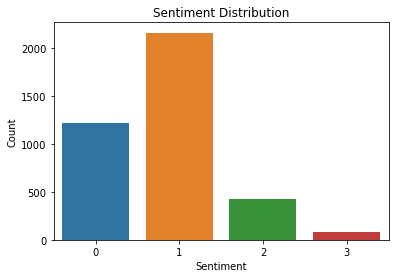

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sentiment distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\seaborn\categorical.py:250: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  vals = pd.Series(vals, index=index)


ValueError: min() arg is an empty sequence

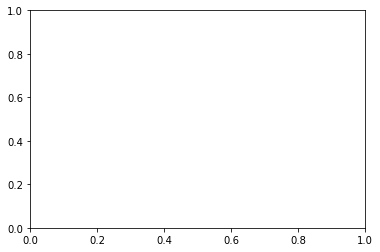

In [29]:
stop_words = set(stopwords.words('english'))
fig, ax = plt.subplots()

df['cleaned_text'] = df['cleaned_text'].astype(str)

corpus=[]
new= df['cleaned_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict

dic=defaultdict(int)
for word in corpus:
    if word in stop_words:
        dic[word]+=1
        
top25 = sorted(dic.items(), key=lambda item: item[1], reverse=True)[:20]

y_val = [x[0] for x in top25]
x_val = [x[1] for x in top25]

ax = sns.barplot(x_val,y_val, orient='h')
ax = ax.set_title('Top 20 Stop Words Used')

plt.tight_layout()
fig.savefig('images/stopwords.png');

#Word Cloud for Most Frequent Terms
Visualize the most common words in your dataset, which can give you an idea of the frequent terms in the text data.

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

# Combine all cleaned text into a single string
all_text = ' '.join(df['cleaned_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Most Frequent Words in the Tweets')
plt.show()


## Top Positive and Negative Words
You can visualize the most frequent words in positive and negative sentiment categories. Here's a quick way to extract and plot them:

In [30]:
print(df['sentiment'].value_counts())


1    2162
0    1219
2     423
3      82
Name: sentiment, dtype: int64


In [31]:
#filter for positive and negative tweets
positive_tweets = df[df['sentiment'] == 1]
negative_tweets = df[df['sentiment'] == 0]


In [32]:
#Ectract text for generation
positive_text = ' '.join(positive_tweets['cleaned_text'])
negative_text = ' '.join(negative_tweets['cleaned_text'])


In [33]:
#Generate worldcloud plot
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for both positive and negative sentiments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Plot the word clouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Positive Sentiment")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Negative Sentiment")
plt.axis('off')

plt.tight_layout()
plt.show()


ValueError: Only supported for TrueType fonts

## **Modeling**
In this section, we will build multiple models iteratively, starting from a simple baseline model and progressively adding more complexity. We will compare the performance of each model and justify the improvements over the previous ones based on the results. The goal is to demonstrate an effective approach to model-building, starting from a basic model and moving toward more advanced techniques.



In [ ]:
#Train and test splits
from sklearn.model_selection import train_test_split

# Assuming 'X' is the feature matrix (TF-IDF features) and 'y' is the target variable (sentiment)
X = vectorizer.transform(df['cleaned_text']).toarray()  # Or you can use the vectorized version from earlier
y = df['sentiment']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets
print(X_train.shape, X_test.shape)


## 1. Baseline Model: Logistic Regression
Model Description:
We begin by training a Logistic Regression model as our baseline. Logistic Regression is a simple yet effective model for binary classification tasks. It will provide us with an initial benchmark to compare more complex models against.


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the baseline Logistic Regression model
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)

# Make predictions on the test set
baseline_y_pred = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, baseline_y_pred)
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, baseline_y_pred))


## 2. Improved Model: Random Forest Classifier
Model Description:
To improve upon the baseline Logistic Regression model, we introduce a Random Forest Classifier. Random Forest is an ensemble method that builds multiple decision trees and combines their results to improve prediction accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, rf_y_pred))


## 3. Further Improvement: Support Vector Machine (SVM)
Model Description:
Next, we experiment with a Support Vector Machine (SVM). The SVM is a powerful classifier, especially effective in high-dimensional spaces, such as the feature space generated by text data.



In [ ]:
from sklearn.svm import SVC

# Initialize and train the Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, svm_y_pred))


In [ ]:
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_y_pred = xgb_model.predict(X_test)

# Evaluate the XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print("Classification Report:")
print(classification_report(y_test, xgb_y_pred))


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Assuming the baseline model was Logistic Regression and it performed well, we use it as the final model
final_model = LogisticRegression(max_iter=1000)

# Train the final model on the training data
final_model.fit(X_train, y_train)

# Evaluate the final model on the test data
y_test_pred = final_model.predict(X_test)

# Calculate accuracy
final_accuracy = accuracy_score(y_test, y_test_pred)

# Classification report
classification_rep = classification_report(y_test, y_test_pred)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

final_accuracy, classification_rep, conf_matrix


# **Evaluation**

## 4. Final Model Selection & Improvement Analysis

### Final Model:
By comparing the results of each model; Logistic Regression, Random Forest, SVM, and XGBoost, we can giew the progression in terms of accuracy and F1-score. Using these comparisons, the model with the best performance is selected for final evaluation and interpretation.

### Selection
After comparing model performance, model chosen is **Logistic Regression** as the final model. This decision is based on:

- **Accuracy**: Logistic Regression achieved an accuracy of **0.7391**, the highest between all tested.
- **Class Imbalance Handling**:  Logistic Regression struggles with class 3 but performed well on the majority of classes, especially on class 1 (high recall of 94%).
- **Model Simplicity**: Logistic Regression is a relatively simple model, making it easier to interpret and deploy in real-world applications.

Looking at performance across all classes, it is justified that Logistic regression was the best.

## Evaluation Metrics
We used these metrics for Logistic Regression model:

- **Accuracy**: Provides a general overview of model performance but may not be sufficient due to class imbalance.
- **Precision and Recall**: Helps evaluate how model distinguishes between classes.
- **F1-Score**: Balances precision and recall to give a better measure of the model effective ability.
- **Confusion Matrix**: Identifies misclassification patterns, which can be useful for refining the model.

### Final Evaluation Results

- **Accuracy**: 0.7391 = 73.91%
- **Precision and Recall**:
  - **Class 0**: Precision = 79%, Recall = 66%
  - **Class 1**: Precision = 71%, Recall = 94%
  - **Class 2**: Precision = 87%, Recall = 20%
  - **Class 3**: Precision = 0%, Recall = 0%
- **F1-Score**:
  - **Highest for Class 1 (0.81)**
  - **Lowest for Class 3 (0.00)**

### Interpreting the Evaluation Results
- The model  predicts **73.91% of test samples**.
- It performs well on **majority classes ** but hard time with **rare accident causes (Class 2 & Class 3)**.
- **Class imbalance remains an issue**, as **Class 3 is not predicted at all**.

## Next Steps: Refinement

### 1. Handling Class Imbalance
- **Oversampling Minority Classes**: Implement **SMOTE (Synthetic Minority Over-sampling Technique)** to generate synthetic examples for underrepresented classes.
- **Class Weight Adjustment**: Modify the class weights during training to ensure the model focuses on the minority classes.

### 2. Model Improvement Techniques
- **Hyperparameter Tuning**: Use **Grid Search** to find the optimal parameters for Logistic Regression and improve generalization.
- **Ensemble Methods**: Explore **Random Forests or XGBoost** to combine multiple models for better prediction accuracy.

### 3. Addressing Rare Classes in the Data
- **Improving Data Collection**: Gather additional data for underrepresented classes to enhance model training.

### 4. Model Monitoring & Deployment
- **Model Monitoring**: Once deployed, track performance metrics over time.
- **Retraining**: Update the model with new data periodically to maintain accuracy and adaptability.

By implementing these, we can improve the model ability to predict minority classes and enhance its real-world application.
